# [과제 3] 로지스틱 회귀분석
### - sklearn 패키지를 사용해 로지스틱 회귀분석을 진행해주세요.
### - 성능지표를 계산하고 이에 대해 해석해주세요.
### - 성능 개선을 시도해주세요. (어떠한 성능지표를 기준으로 개선을 시도했는지, 그 이유도 함께 적어주세요.)
### - 주석으로 설명 및 근거 자세하게 달아주시면 감사하겠습니다. :)

## Data 

출처 : https://www.kaggle.com/mlg-ulb/creditcardfraud


* V1 ~ V28 : 비식별화 된 개인정보 
* **Class** : Target 변수  
  - 1 : fraudulent transactions (사기)
  - 0 : otherwise 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
data = pd.read_csv("assignment3_creditcard.csv")

In [3]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-1.848212,2.384900,0.379573,1.048381,-0.845070,2.537837,-4.542983,-10.201458,-1.504967,-2.234167,...,2.585817,-5.291690,0.859364,0.423231,-0.506985,1.020052,-0.627751,-0.017753,0.280982,0
1,2.071805,-0.477943,-1.444444,-0.548657,0.010036,-0.582242,-0.042878,-0.247160,1.171923,-0.342382,...,-0.077306,0.042858,0.390125,0.041569,0.598427,0.098803,0.979686,-0.093244,-0.065615,0
2,-2.985294,-2.747472,1.194068,-0.003036,-1.151041,-0.263559,0.553500,0.635600,0.438545,-1.806488,...,1.345776,0.373760,-0.385777,1.197596,0.407229,0.008013,0.762362,-0.299024,-0.303929,0
3,-1.479452,1.542874,0.290895,0.838142,-0.529290,-0.717661,0.484516,0.545092,-0.780767,0.324804,...,0.038397,0.116771,0.405560,-0.116453,0.541275,-0.216665,-0.415578,0.027126,-0.150347,0
4,-0.281976,-0.309699,-2.162299,-0.851514,0.106167,-1.483888,1.930994,-0.843049,-1.249272,1.079608,...,-0.875516,-0.004199,1.015108,-0.026748,0.077115,-1.468822,0.751700,0.496732,0.331001,0


In [4]:
data.shape

(28678, 29)

In [5]:
data.isnull().sum() #결측치는 없다.

V1       0
V2       0
V3       0
V4       0
V5       0
V6       0
V7       0
V8       0
V9       0
V10      0
V11      0
V12      0
V13      0
V14      0
V15      0
V16      0
V17      0
V18      0
V19      0
V20      0
V21      0
V22      0
V23      0
V24      0
V25      0
V26      0
V27      0
V28      0
Class    0
dtype: int64

In [13]:
X=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [14]:
X

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
0,-1.848212,2.384900,0.379573,1.048381,-0.845070,2.537837,-4.542983,-10.201458,-1.504967,-2.234167,...,0.159752,2.585817,-5.291690,0.859364,0.423231,-0.506985,1.020052,-0.627751,-0.017753,0.280982
1,2.071805,-0.477943,-1.444444,-0.548657,0.010036,-0.582242,-0.042878,-0.247160,1.171923,-0.342382,...,0.644970,-0.077306,0.042858,0.390125,0.041569,0.598427,0.098803,0.979686,-0.093244,-0.065615
2,-2.985294,-2.747472,1.194068,-0.003036,-1.151041,-0.263559,0.553500,0.635600,0.438545,-1.806488,...,-0.885471,1.345776,0.373760,-0.385777,1.197596,0.407229,0.008013,0.762362,-0.299024,-0.303929
3,-1.479452,1.542874,0.290895,0.838142,-0.529290,-0.717661,0.484516,0.545092,-0.780767,0.324804,...,0.663398,0.038397,0.116771,0.405560,-0.116453,0.541275,-0.216665,-0.415578,0.027126,-0.150347
4,-0.281976,-0.309699,-2.162299,-0.851514,0.106167,-1.483888,1.930994,-0.843049,-1.249272,1.079608,...,-0.531789,-0.875516,-0.004199,1.015108,-0.026748,0.077115,-1.468822,0.751700,0.496732,0.331001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28673,2.063299,0.015015,-1.042161,0.409655,-0.069835,-1.198490,0.243507,-0.385099,0.408691,0.047861,...,0.137028,-0.169749,-0.278942,-0.625629,0.331276,0.070205,-0.269826,0.192509,-0.064914,-0.058058
28674,1.264844,-1.228616,1.579098,-0.204514,-1.958881,0.546495,-1.764072,0.470377,1.002209,0.274005,...,0.643614,-0.125401,0.144909,0.718615,-0.038493,0.103706,0.341100,-0.009807,0.089794,0.019848
28675,2.072659,0.190048,-1.759688,0.378909,0.556826,-0.769874,0.246899,-0.274561,0.380960,-0.405147,...,0.104002,-0.084170,-0.361188,-0.910782,0.304372,0.401511,-0.212440,0.177857,-0.058961,-0.029035
28676,-0.690637,1.342271,1.498129,2.049774,1.055691,0.677197,0.855445,-0.467242,-0.681576,1.485542,...,0.057182,0.030868,0.110939,0.453065,-0.355346,-0.771072,-0.358505,0.101309,-0.849084,-0.312999


In [15]:
y

0        0
1        0
2        0
3        0
4        0
        ..
28673    0
28674    0
28675    0
28676    0
28677    0
Name: Class, Length: 28678, dtype: int64

일단 전처리 안한 데이터로 로지스틱을 진행시켜봤다.

In [17]:
from sklearn.model_selection import train_test_split
# 데이터를 train과 test로 분리
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=10)

In [18]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [19]:
print(model.score(x_train, y_train))
print(model.score(x_test, y_test))

0.9983000610234505
0.9975592747559274


In [20]:
 #계수 출력

[[ 0.20963154 -0.13274617 -0.03948006  0.93150305 -0.02727169 -0.30699927
  -0.02441401 -0.32446648  0.03334746 -0.84032742  0.11252138 -0.49252436
  -0.21773991 -0.68789288 -0.28652886 -0.33681424  0.03409545 -0.23405378
   0.0453728  -0.23561441  0.41852574  0.61523064 -0.14624563  0.3115803
  -0.05999241 -0.68662476 -0.35108111  0.10023006]]


높은 정확도가 나와서 조금 수상하긴하다.

<AxesSubplot:xlabel='Class', ylabel='count'>

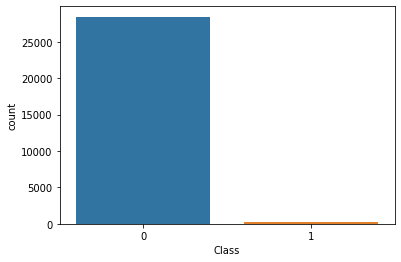

In [22]:
sns.countplot(y) #불균형이다 데이터가

In [26]:
from imblearn.over_sampling import SMOTE
#데이터의 불균형성을 맞추기 위해 데이터를 늘림

smote = SMOTE(random_state=0)
x_train_over,y_train_over = SMOTE(random_state=0).fit_resample(x_train, y_train)
print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트: ', x_train.shape, y_train.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트: ', x_train_over.shape, y_train_over.shape)
print('SMOTE 적용 후 레이블 값 분포: \n', pd.Series(y_train_over).value_counts())

SMOTE 적용 전 학습용 피처/레이블 데이터 세트:  (22942, 28) (22942,)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트:  (45490, 28) (45490,)
SMOTE 적용 후 레이블 값 분포: 
 1    22745
0    22745
Name: Class, dtype: int64


In [28]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=0)
x_test_over,y_test_over = SMOTE(random_state=0).fit_resample(x_test, y_test)
print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트: ', x_test.shape, y_test.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트: ', x_test_over.shape, y_test_over.shape)
print('SMOTE 적용 후 레이블 값 분포: \n', pd.Series(y_test_over).value_counts())

SMOTE 적용 전 학습용 피처/레이블 데이터 세트:  (5736, 28) (5736,)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트:  (11374, 28) (11374,)
SMOTE 적용 후 레이블 값 분포: 
 1    5687
0    5687
Name: Class, dtype: int64


In [29]:
#정규화 해보기
from sklearn.preprocessing import StandardScaler  
  
scaler = StandardScaler()  #스탠다드 스케일러로 정규화 진행
  
xtrain_s = scaler.fit_transform(x_train_over)  
xtest_s = scaler.transform(x_test_over)


In [31]:
model = LogisticRegression()
model.fit(xtrain_s, y_train_over)

LogisticRegression()

In [33]:
y_pred=model.predict(xtest_s)

In [32]:
print(model.score(xtrain_s, y_train_over))
print(model.score(xtest_s, y_test_over))

0.9540558364475709
0.9539300158255671
